# Regression Trees

## Task
Use regression trees to predict a continuous variable like Total Amount based on various features.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Data-Navigators/Statistical_Concept_Excercise/main/data/Retail_sales_dataset.csv")

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


# Define target variable: HighlyProfitable (1 if Total Amount > threshold, else 0)
threshold = df['Total Amount'].median()  # or choose a custom value
df['HighlyProfitable'] = (df['Total Amount'] > threshold).astype(int)

# Rename 'Product Category' to 'Product_Category'
df = df.rename(columns={'Product Category': 'Product_Category'})

# Re-apply one-hot encoding, ensuring all categories are represented
df = pd.get_dummies(df, columns=['Gender', 'Product_Category'], drop_first=False, dtype=int)

target_variable = 'Total Amount'


Missing values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [7]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Age', 'Quantity',
       'Price per Unit', 'Total Amount', 'HighlyProfitable', 'Gender_Female',
       'Gender_Male', 'Product_Category_Beauty', 'Product_Category_Clothing',
       'Product_Category_Electronics'],
      dtype='object')

Regression Tree Model Evaluation:
Mean Absolute Error: 0.0000
Mean Squared Error: 0.0000
R-squared: 1.0000


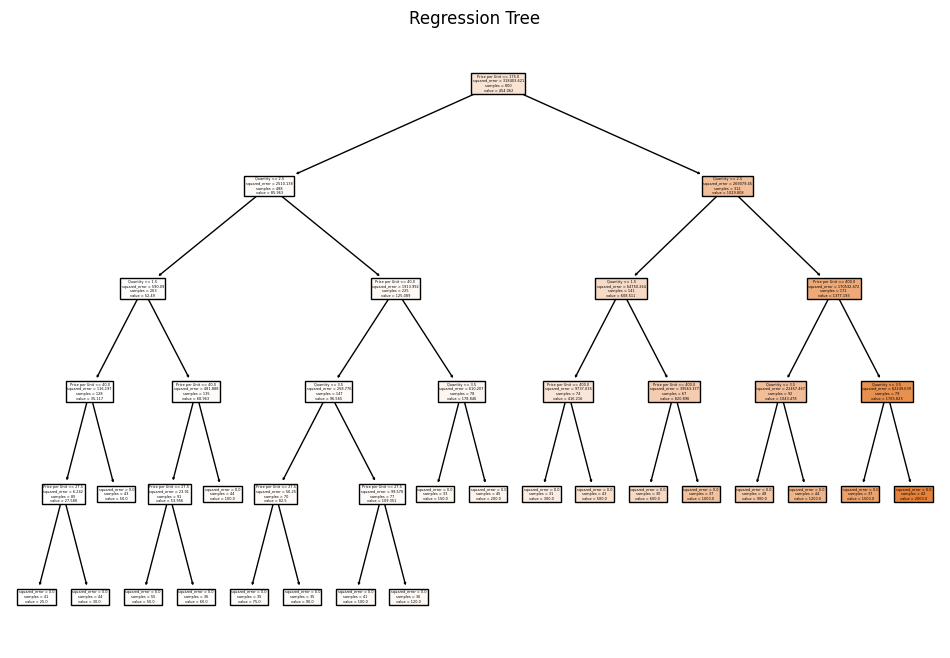

In [11]:
# Define features and target variable
X = df[['Age', 'Quantity', 'Price per Unit', 'Gender_Male', 'Product_Category_Clothing', 'Product_Category_Electronics', 'Product_Category_Beauty']]
y = df[target_variable]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the regression tree model
reg_tree_model = DecisionTreeRegressor(random_state=42)
reg_tree_model.fit(X_train, y_train)

# Predict with regression tree
y_pred = reg_tree_model.predict(X_test)

# Evaluate the regression model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Tree Model Evaluation:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Visualize the regression tree
plt.figure(figsize=(12, 8))
plot_tree(reg_tree_model, feature_names=X.columns, filled=True)
plt.title("Regression Tree")
plt.show()
